#### CS164 Preclass Work for Session 4.2

### Unconstrained Optimization Algorithms: Gradient Descent & Line Search
_Yoav Rabinovich, Feb 20_

---------------------------

_Implement a simple gradient descent solver in Python, using an exact line search with bisection to compute the step size that produces the maximum function decrease at each step. Test your solver on the example problem in Section 4.2 of Freund and plot the convergence along with level sets of the objective function._

In [0]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Optimization functions
def gradient_descent_solver(f, grad_f, x_0, step_cap, epsilon, \
                            line_search_step_cap, line_search_epsilon):
    
    x = x_0
    steps = [x]

    for k in range(0,step_cap):
        # Check for completion
        grad = grad_f(x)
        if np.abs(np.sum(grad)) <= epsilon:
            break
        # Determine descent direction
        d = -grad #/np.linalg.norm(grad)
        # Determine step size
        alpha = exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon)
        # Update
        x = x+alpha*d
        steps.append(x)

    return steps

def exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon):

    h_prime = lambda a : np.dot(grad_f(x+a*d).T,d)

    # Initial guess
    alpha_l = 0
    alpha_u = 1
    for s in range(0,line_search_step_cap):
        if h_prime(alpha_u) <= 0:
            alpha_u = 2*alpha_u

    # Bisection
    for s in range(0,line_search_step_cap):
        # Test alpha_hat
        alpha_t = (alpha_u+alpha_l)/2
        test = h_prime(alpha_t)
        # Check for completion
        if np.abs(test) <= line_search_epsilon:
            break
        # Update
        elif test > 0:
            alpha_u = alpha_t
        elif test < 0:
            alpha_l = alpha_t

    return alpha_t

In [0]:
# Set up
Q = np.array([[20,5],[5,2]])
q = np.array ([[14],[6]])
c = 10

def f(x,Q,q,c):
    return 0.5*np.dot(np.dot(x.T,Q),x)-np.dot(q.T,x)+c

def grad_f(x):
    return np.dot(Q,x)+q

In [0]:
# Optimization
x_0 = np.array([[40],[-100]])
step_cap = 100
epsilon = 1e-5
line_search_step_cap = 100
line_search_epsilon = 1e-5

steps = gradient_descent_solver(f,grad_f,x_0,step_cap,epsilon,\
                                line_search_step_cap,line_search_epsilon)

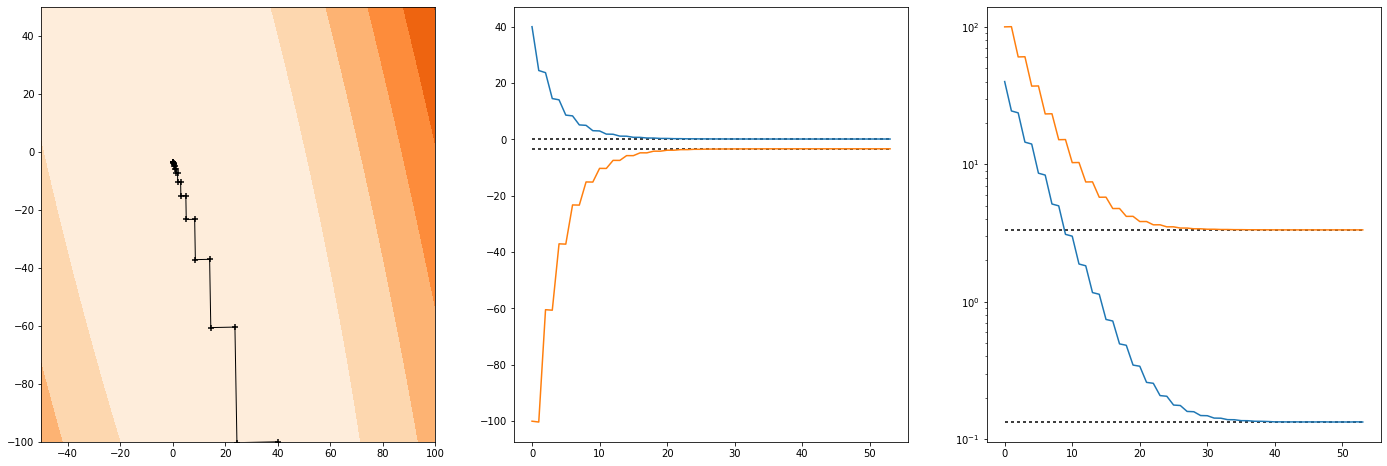

In [0]:
# Plotting
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax1.axis([-50, 100, -100, 50])
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Level sets
X, Y = np.meshgrid(np.linspace(-100,100,1000), np.linspace(-100,100,1000))
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]),Q,q,c)
# Z = np.array(Z).reshape(X.shape)
ax1.contourf(X,Y,Z,cmap="Oranges")

# Descent
steps_x,steps_y = zip(*steps)
ax1.scatter(steps_x,steps_y,c="black",marker="+",linewidths=2)
ax1.plot(steps_x,steps_y,c="black",linewidth=1)

# Convergence
x_range = range(len(steps_x))

ax2.plot(x_range,np.full(len(steps_x),0.1333),dashes=[2,2],c="black")
ax2.plot(x_range,np.full(len(steps_x),-3.3333),dashes=[2,2],c="black")
ax2.plot(x_range,steps_x)
ax2.plot(x_range,steps_y)

ax3.plot(x_range,np.full(len(steps_x),0.1333),dashes=[2,2],c="black")
ax3.plot(x_range,np.full(len(steps_x),3.3333),dashes=[2,2],c="black")
ax3.semilogy(x_range,steps_x)
ax3.semilogy(x_range,np.abs(steps_y))

plt.show()